# Regression

## Simple data

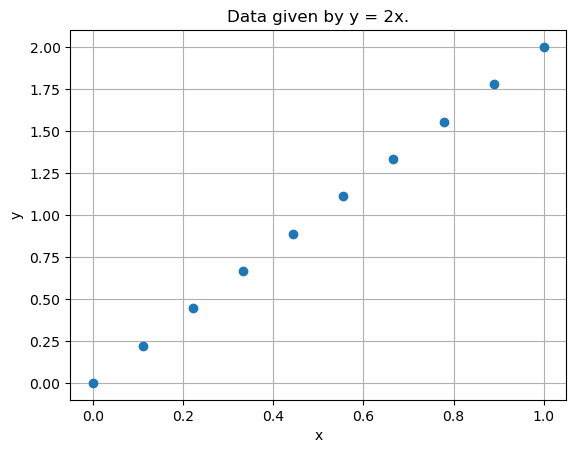

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define arbitrarly x
x = np.linspace(0, 1, 10)
y = 2 * x

# Visualize the data
plt.plot(x, y, 'o')
plt.title("Data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

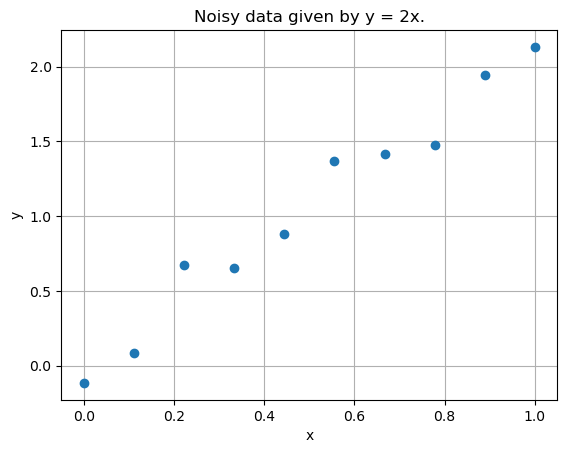

In [2]:
# Consider a little bit of noise
y_noisy = y + np.random.normal(loc=0, scale=0.2, size=y.shape)

# Visualize the noisy data
plt.plot(x, y_noisy, 'o')
plt.title("Noisy data given by y = 2x.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### Training

[-0.03910544  2.18136392]


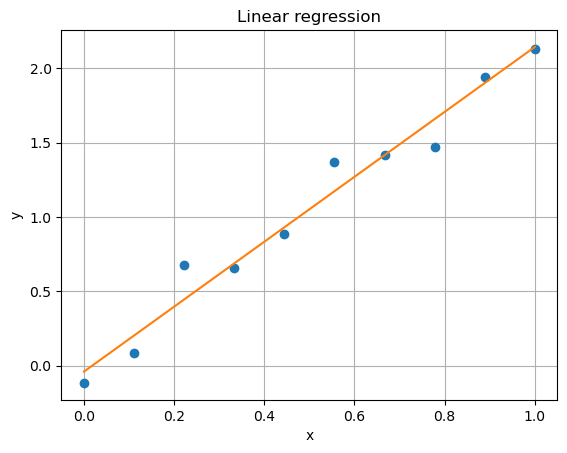

In [14]:
N = x.shape[0]

X = np.ones((2,N))
X[1] = x
Y = y_noisy

# solve X XT theta = X Y
L = np.linalg.cholesky(X@X.T)

# solve L z = X Y
z = np.linalg.solve(L, X @ Y)

# solve LT theta = z
theta = np.linalg.solve(L.T, z)

print(theta)

f = lambda x, p: x*p[1]+p[0] 

# Visualize the data
plt.plot(x, y_noisy, 'o')
plt.plot(x, f(x, theta))
plt.title("Linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Complex data

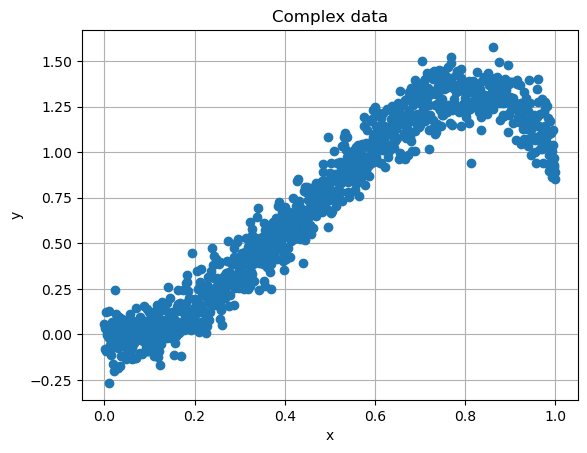

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("./data/poly_regression_large.csv")
x, y = data["x"], data["y"]

# Visualize the data
plt.plot(x, y, 'o')
plt.title("Complex data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### Training

#### Linear model

[-0.07426977  1.6109367 ]


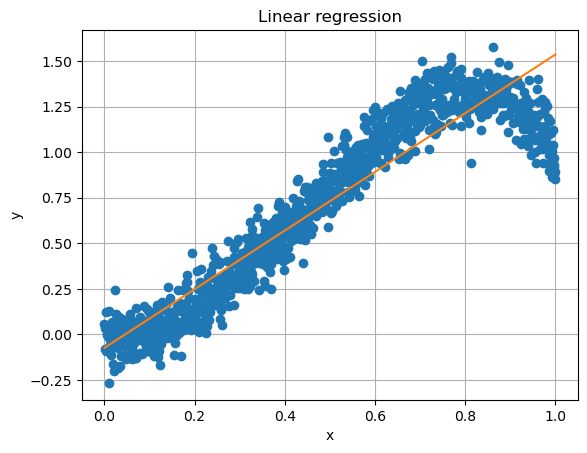

In [39]:
N = x.shape[0]

X = np.ones((2,N))
X[1] = x
Y = y

# solve X XT theta = X Y
L = np.linalg.cholesky(X@X.T)

# solve L z = X Y
z = np.linalg.solve(L, X @ Y)

# solve LT theta = z
theta = np.linalg.solve(L.T, z)

print(theta)

f = lambda x, p: x*p[1]+p[0] 

# Visualize the data
plt.plot(x, y, 'o')
plt.plot(x, f(x, theta))
plt.title("Linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#### Polynomial model

[ 0.00977328 -0.61968304  7.40473182 -5.74709709]


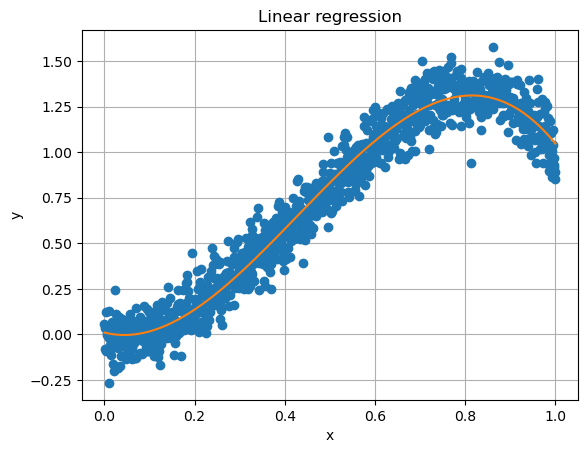

In [ ]:
N = x.shape[0]

def vandermonde(x, K):
    v = np.ones((K, N))
    for i in range(1, K):
        v[i] = x ** i
    return v

PhiX = vandermonde(x, K=4)
Y = y


# solve X XT theta = X Y
L = np.linalg.cholesky(PhiX @ PhiX.T)

# solve L z = X Y
z = np.linalg.solve(L, PhiX @ Y)

# solve LT theta = z
theta = np.linalg.solve(L.T, z)

print(theta)


f = lambda x, p: sum([x**i*p[i] for i in range(len(p))])

# Visualize the data
plt.plot(x, y, 'o')
plt.plot(x, f(x, theta))
plt.title("Polynomial regression")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


#### SGD

In [44]:
import numpy as np

def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling
    
    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history, loss_history, grad_norm_history

In [ ]:
f = lambda x, p: sum([x**i*p[i] for i in range(len(p))])

def loss(theta, X, y):
    y_pred = f(X, theta)
    error = np.square(y_pred - y)
    return np.mean(error)

def grad_loss(theta, X, y):
    N = len(y)
    return 2/N * (f(X, theta) - y)


# Visualize the data
plt.plot(x, y, 'o')
plt.plot(x, f(x, theta))
plt.title("Linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
